Objective:  Building a CNN Model for Marble quality classification.  
There are 4 types of marble quality and totally 2249 images for train , validation and 668 test images.  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
batch_size = 32
img_height = 224
img_width = 224
train_dir = '../input/marble-surface-anomaly-detection-2/dataset/train'
test_dir = '../input/marble-surface-anomaly-detection-2/dataset/test'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 1800 files for training.


2022-01-23 14:09:20.251509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 14:09:20.400399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 14:09:20.401434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 14:09:20.405516: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 449 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 688 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['crack', 'dot', 'good', 'joint']


2022-01-23 14:09:39.765857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


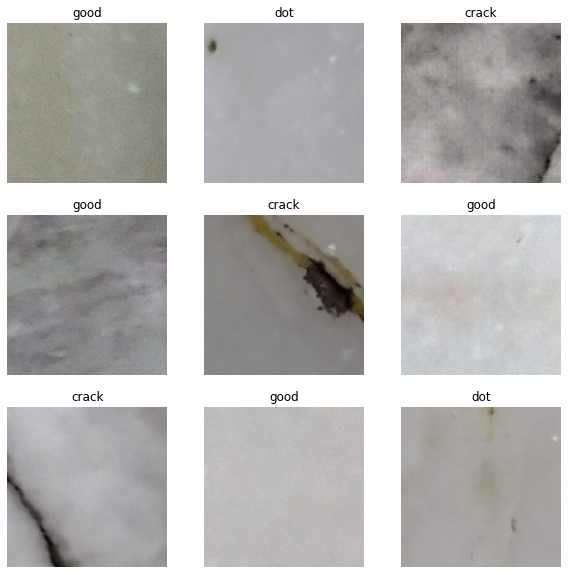

In [7]:
## Visualize train dataset images 

image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

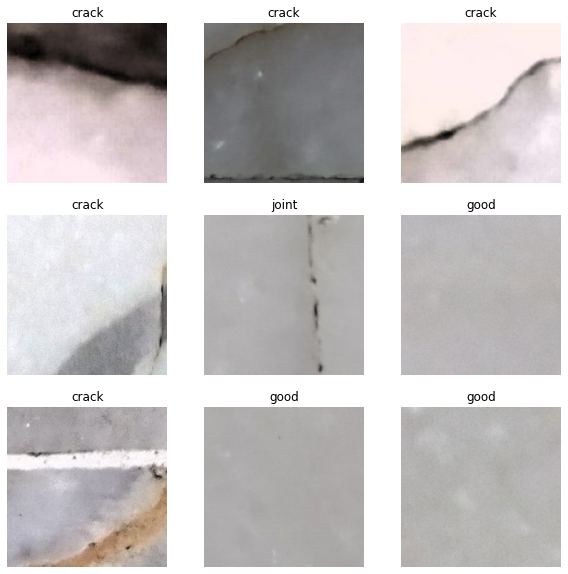

In [8]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

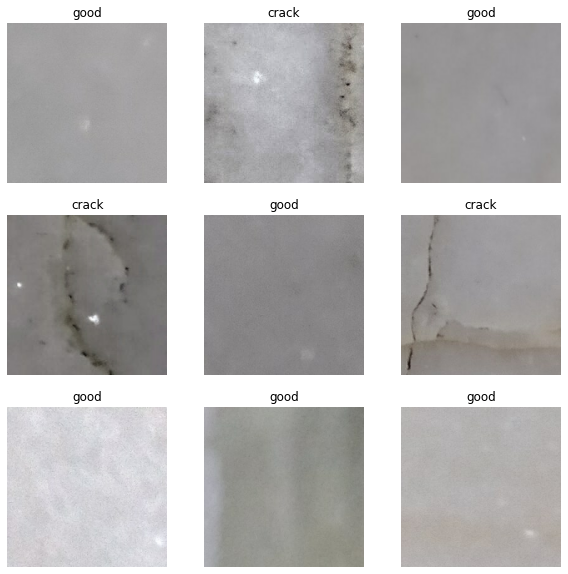

In [9]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Check the number of classes in the train , validation and test images.

In [10]:

labels = np.array([])
for x, y in train_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Train labels \n{} ".format(pd.Series(labels).value_counts()))

Train labels 
0.0    794
2.0    680
3.0    250
1.0     76
dtype: int64 


In [11]:
labels = np.array([])
for x, y in val_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Validation labels \n{} ".format(pd.Series(labels).value_counts()))

Validation labels 
0.0    190
2.0    180
3.0     63
1.0     16
dtype: int64 


In [12]:
labels = np.array([])
for x, y in test_ds:
    labels = np.concatenate([labels , y.numpy()])
print("Test labels \n{} ".format(pd.Series(labels).value_counts()))

Test labels 
2.0    340
0.0    246
3.0     78
1.0     24
dtype: int64 


The distribution of classes in the train and valdation data is nearly the same. More 'crack' cases followed by 'good' , 'joint' and 'dot.  
How ever in the test data, 'good' cases more than 'crack'.  

2022-01-23 14:12:56.364562: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 3min 45s, sys: 33.5 s, total: 4min 18s
Wall time: 4min 8s
57/57 [==============================] - 3s 41ms/step - loss: 0.1817 - accuracy: 0.9511
Train image accuracy :0.9511111378669739
22/22 [==============================] - 1s 37ms/step - loss: 1.8055 - accuracy: 0.8285
Test image accuracy :0.8284883499145508


2022-01-23 14:17:06.756696: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

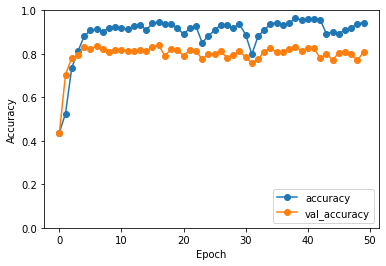

In [13]:
## 2 layer cnn + max pooling 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_2')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

CPU times: user 3min 54s, sys: 29 s, total: 4min 23s
Wall time: 3min 40s
57/57 [==============================] - 3s 41ms/step - loss: 0.2246 - accuracy: 0.9361
Train image accuracy :0.9361110925674438
22/22 [==============================] - 1s 42ms/step - loss: 2.6647 - accuracy: 0.8358
Test image accuracy :0.8357558250427246
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
______________________________________________________

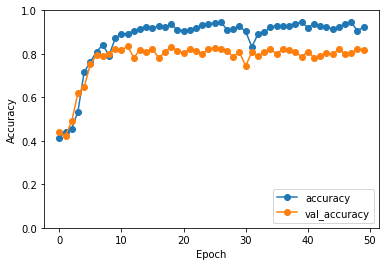

In [14]:
## 2 layer cnn + max pooling - with increased filters -32 and 64

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_2')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

Increasing the filters has not  improved the model by large.  

CPU times: user 3min 40s, sys: 28.7 s, total: 4min 9s
Wall time: 3min 47s
57/57 [==============================] - 3s 44ms/step - loss: 0.0123 - accuracy: 0.9939
Train image accuracy :0.9938889145851135
22/22 [==============================] - 1s 33ms/step - loss: 1.5567 - accuracy: 0.8459
Test image accuracy :0.8459302186965942
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 16)      1168      
_____________________________________________________

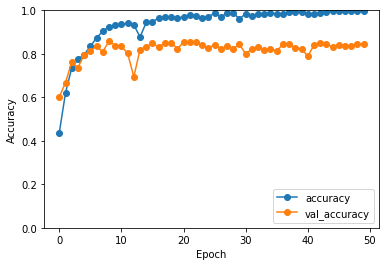

In [15]:
## 2 layer cnn + max pooling - with reduced filters 8 and 16 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_2')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

Reducing the filters has slightly improved the F1 score of the classes and the accuracy.  

CPU times: user 3min 42s, sys: 26.5 s, total: 4min 9s
Wall time: 3min 33s
57/57 [==============================] - 3s 39ms/step - loss: 1.5783e-04 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 31ms/step - loss: 2.4064 - accuracy: 0.8619
Test image accuracy :0.8619186282157898
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 16)      1168      
________________________________________________________________

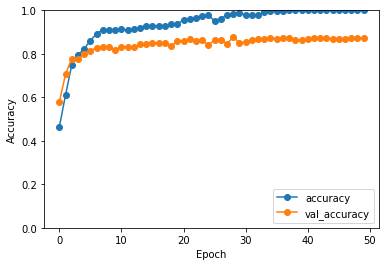

In [16]:
## 3 layer CNN model with lesser filters 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_3')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

A slight increment in the accuracy with the 3rd CNN + Max Pooling layer.  

CPU times: user 3min 46s, sys: 26.8 s, total: 4min 13s
Wall time: 3min 30s
57/57 [==============================] - 3s 39ms/step - loss: 1.0440e-04 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 31ms/step - loss: 1.8542 - accuracy: 0.8794
Test image accuracy :0.8793604373931885
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 16)      1168      
_______________________________________________________________

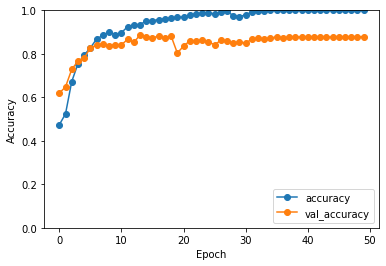

In [17]:
## 4  layer CNN model with lesser filters 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

Another push to the accuracy and better F1 scores with the 4th CNN + Max Pooling layer.  

CPU times: user 3min 48s, sys: 28.6 s, total: 4min 16s
Wall time: 3min 38s
57/57 [==============================] - 3s 39ms/step - loss: 5.3334e-05 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 30ms/step - loss: 1.2253 - accuracy: 0.9070
Test image accuracy :0.9069767594337463
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 16)      1168      
_______________________________________________________________

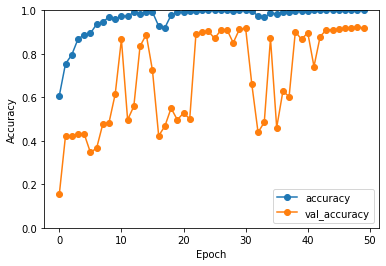

In [18]:
## 4 layer CNN + Max Pooling with batch normalization 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

Batch normalization has improved the model accuracy further to 0.91 .  
How ever the f1 score for 'dot' is poor at 0.5.  

CPU times: user 7min 45s, sys: 48.9 s, total: 8min 34s
Wall time: 7min 13s
57/57 [==============================] - 3s 53ms/step - loss: 3.5205e-06 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 31ms/step - loss: 1.8308 - accuracy: 0.8895
Test image accuracy :0.8895348906517029
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 16)      1168      
______________________________________________________________

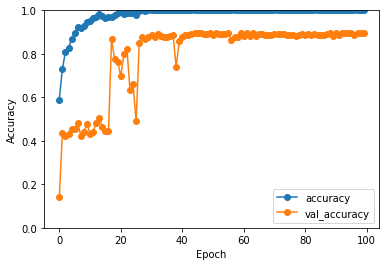

In [25]:
## For the same model above , increase the epochs 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=100, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

Increasing the epochs  has not improved the accuracy.  

CPU times: user 3min 40s, sys: 28.9 s, total: 4min 9s
Wall time: 3min 37s
57/57 [==============================] - 3s 38ms/step - loss: 11.6503 - accuracy: 0.4872
Train image accuracy :0.48722222447395325
22/22 [==============================] - 1s 30ms/step - loss: 15.7304 - accuracy: 0.3794
Test image accuracy :0.37936046719551086
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


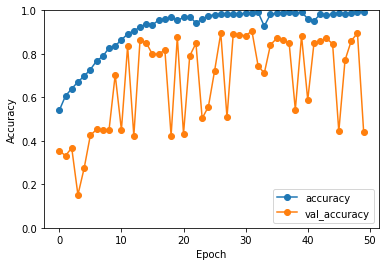

In [19]:
## For the same model above , change the optimizer to SGD

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=50, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

We can see a huge variation in validation accuracy .  

CPU times: user 7min 42s, sys: 57 s, total: 8min 39s
Wall time: 7min 16s
57/57 [==============================] - 3s 39ms/step - loss: 0.0040 - accuracy: 0.9994
Train image accuracy :0.9994444251060486
22/22 [==============================] - 1s 37ms/step - loss: 0.6055 - accuracy: 0.8895
Test image accuracy :0.8895348906517029
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 16)      1168      
______________________________________________________

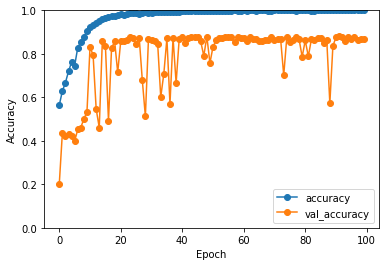

In [21]:
## Change the optimizer to SGD and with epochs = 100

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=100, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

CPU times: user 11min 32s, sys: 1min 21s, total: 12min 54s
Wall time: 10min 35s
57/57 [==============================] - 3s 40ms/step - loss: 0.0034 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 36ms/step - loss: 0.4904 - accuracy: 0.9026
Test image accuracy :0.9026162624359131
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 16)      1168      
______________________________________________________________

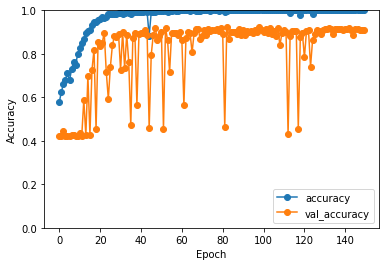

In [22]:
## Higher epochs - 150

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=150, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

CPU times: user 19min 11s, sys: 2min 23s, total: 21min 34s
Wall time: 17min 54s
57/57 [==============================] - 3s 39ms/step - loss: 3.7497e-04 - accuracy: 1.0000
Train image accuracy :1.0
22/22 [==============================] - 1s 37ms/step - loss: 0.5218 - accuracy: 0.9157
Test image accuracy :0.9156976938247681
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________

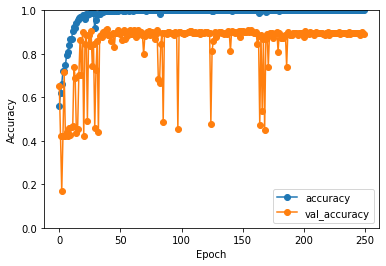

In [23]:
## Higher epochs - 250 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=250, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

CPU times: user 19min 14s, sys: 2min 15s, total: 21min 30s
Wall time: 17min 44s
57/57 [==============================] - 3s 40ms/step - loss: 0.7330 - accuracy: 0.8100
Train image accuracy :0.8100000023841858
22/22 [==============================] - 2s 60ms/step - loss: 1.1022 - accuracy: 0.7602
Test image accuracy :0.7601743936538696
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 112, 112, 16)      1168      
______________________________________________

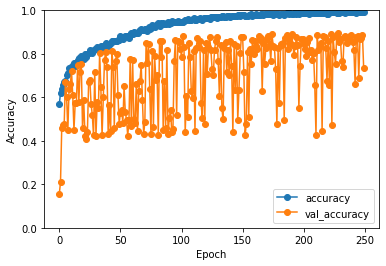

In [24]:
## Higher epochs - 250 , learning rate = 0.001

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation=tf.nn.relu),
tf.keras.layers.Dense(4, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds,  epochs=250, validation_data = val_ds, verbose = 0)
##
train_loss, train_acc = model.evaluate(train_ds)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test_ds)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn_4')
##

##
print(model.summary())

##
## for test  data set , check the classification report.

test_pred = np.array([])
test_labels = np.array([])
for x, y in test_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))

As seen above , more epochs are needed to get the same accuracy as Optimiser Adam.  
Hence optimiser Adam is better than SGD .  

In continuation- Build and test denser CNN + Max Pooling models and check the improvement in performance.  